In [1]:
import os
from dotenv import load_dotenv, find_dotenv
import tensorflow as tf
import labelbox as lb
from pprint import pprint
import json

from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import numpy as np
import PIL

_=load_dotenv(find_dotenv())

In [2]:
client = lb.Client()

In [3]:
proj = client.get_project("clp7euycs059o0703gmcug1re")
model_run = client.get_model_run("a2fcc7cf-44df-0830-c56c-a0d2feec7ce0")

In [5]:
export_params= {
  "attachments": False,
  "metadata_fields": False,
  "data_row_details": True,
  "project_details": True,
  "performance_details": True
}

export_task = model_run.export_v2(params=export_params)
export_task.wait_till_done()

if export_task.errors:
    print(export_task.errors)

export_json = export_task.result

In [8]:
pprint(export_json[0]["data_row"]["external_id"]) #Image
pprint(export_json["experiments"]["a2ec9b4a-7a70-023d-3786-88922ffc970c"]["runs"]["a2fcc7cf-44df-0830-c56c-a0d2feec7ce0"]["labels"][0]["annotations"]["classifications"][0]["checklist_answers"][0]["name"]) #label

'./raw-img/farfalla/OIP-nXp3D3FO22tV6SLkEFEtsAHaE7.jpeg'
'farfalla'


In [12]:
client.enable_experimental = True

config = model_run.get_config()
IMG_SIZE = config["image_size"]

In [13]:
def get_img(data):
  img = data["data_row"]["external_id"]
  label = data["experiments"]["a2ec9b4a-7a70-023d-3786-88922ffc970c"]["runs"]["a2fcc7cf-44df-0830-c56c-a0d2feec7ce0"]["labels"][0]["annotations"]["classifications"][0]["checklist_answers"][0]["name"]
  img = Image.open(img)
  return img, label

In [15]:
imgs, labels = [], []
for i, data in enumerate(export_json):
  img, label = get_img(data)
  img = img.resize((IMG_SIZE, IMG_SIZE))
  img = np.asarray(img, dtype=np.float32) / 255
  if img.shape != (IMG_SIZE,IMG_SIZE,3):
    continue
  imgs.append(img)
  labels.append(label)


farfalla


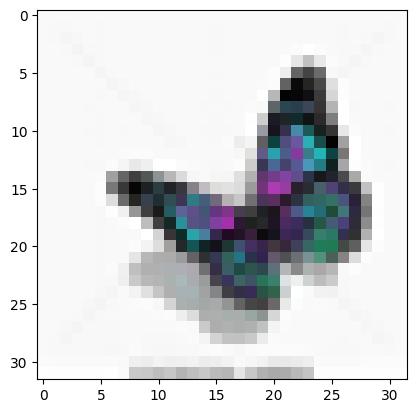

In [16]:
plt.imshow(imgs[80])
print(labels[80])

In [ ]:
class_name = list(set(labels))